### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Dataset Collection

In [2]:
data = {
    "AQI": [85, 110, 95, 70, 120, 130, np.nan, 105, 90, 115],
    "Temperature": [30, 32, 28, 25, 35, 36, 31, np.nan, 29, 34],
    "Humidity": [45, 40, 55, 60, 35, 30, 50, 42, np.nan, 38],
    "CO2": [400, 420, 390, 370, 450, 460, 410, 430, 395, np.nan],
    "PM2.5": [60, 75, 65, 55, 80, 85, 70, 78, 62, 82]
}

df = pd.DataFrame(data)
print(df)

     AQI  Temperature  Humidity    CO2  PM2.5
0   85.0         30.0      45.0  400.0     60
1  110.0         32.0      40.0  420.0     75
2   95.0         28.0      55.0  390.0     65
3   70.0         25.0      60.0  370.0     55
4  120.0         35.0      35.0  450.0     80
5  130.0         36.0      30.0  460.0     85
6    NaN         31.0      50.0  410.0     70
7  105.0          NaN      42.0  430.0     78
8   90.0         29.0       NaN  395.0     62
9  115.0         34.0      38.0    NaN     82


### Data Preprocessing

In [3]:
print(df.info())         # Check data types
print(df.duplicated().sum())   # Check duplicates

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AQI          9 non-null      float64
 1   Temperature  9 non-null      float64
 2   Humidity     9 non-null      float64
 3   CO2          9 non-null      float64
 4   PM2.5        10 non-null     int64  
dtypes: float64(4), int64(1)
memory usage: 532.0 bytes
None
0


### Identify Missing Values

In [4]:
print(df.isnull().sum())  # Count missing values

AQI            1
Temperature    1
Humidity       1
CO2            1
PM2.5          0
dtype: int64


### Handle Missing Data

In [5]:
# Fill missing numeric values with column mean
df = df.fillna(df.mean(numeric_only=True))

### Compute the Correlation Matrix

In [6]:
corr_matrix = df.corr()
print("\nCorrelation Matrix:")
print(corr_matrix)


Correlation Matrix:
                  AQI  Temperature  Humidity       CO2     PM2.5
AQI          1.000000     0.955924 -0.871735  0.924813  0.966563
Temperature  0.955924     1.000000 -0.939425  0.929878  0.921924
Humidity    -0.871735    -0.939425  1.000000 -0.900327 -0.840454
CO2          0.924813     0.929878 -0.900327  1.000000  0.894218
PM2.5        0.966563     0.921924 -0.840454  0.894218  1.000000


### Generate a Heatmap

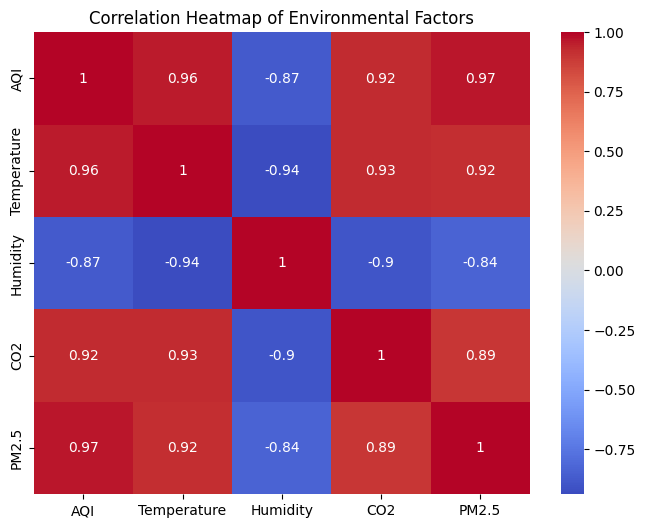

In [7]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Environmental Factors")
plt.show()

### Customize Heatmap Colors

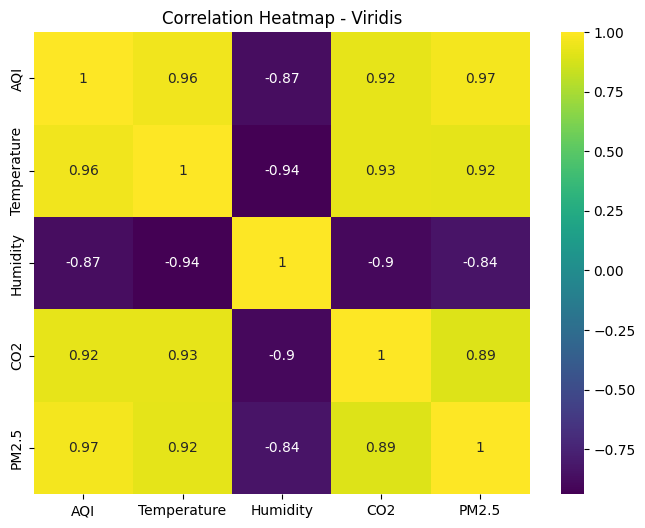

In [8]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="viridis")
plt.title("Correlation Heatmap - Viridis")
plt.show()

### Refine with line widths

<Axes: >

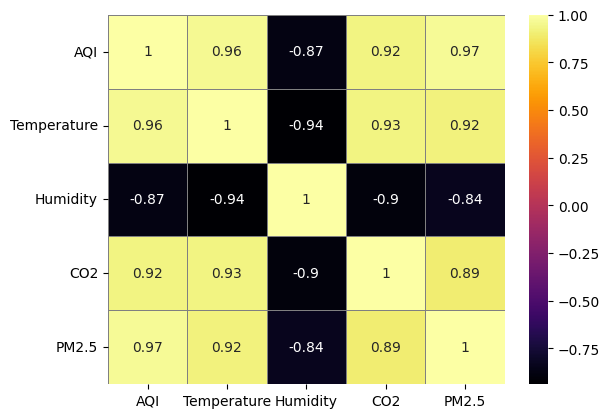

In [9]:
sns.heatmap(corr_matrix, annot=True, cmap="inferno", linewidths=0.5, linecolor="grey")

### Mask Missing Data in Heatmap

<Axes: >

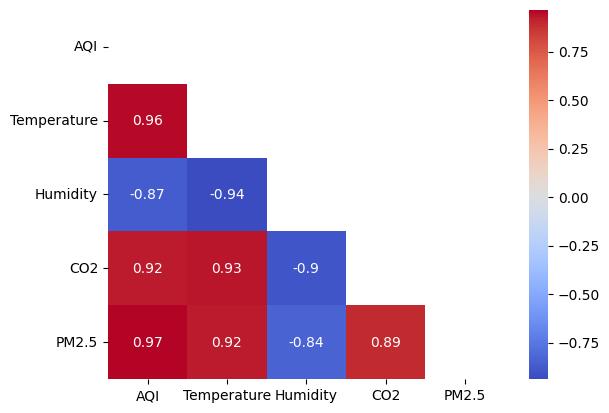

In [10]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Show only lower triangle
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap="coolwarm")

### Use a Custom Color Map

<Axes: >

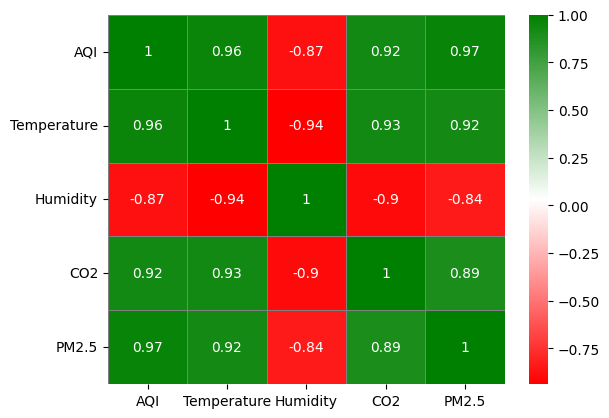

In [12]:
from matplotlib.colors import LinearSegmentedColormap

custom_cmap = LinearSegmentedColormap.from_list("custom", ["red","white","green"])

sns.heatmap(corr_matrix, annot=True, cmap=custom_cmap, linewidths=0.5, linecolor="grey")

### Interpret Results from Heatmap

- Temperature vs AQI: Strong positive correlation → higher temp linked with poor air quality.

- Humidity vs PM2.5: Negative correlation → high humidity reduces particulate matter.

- CO2 vs AQI: Positive correlation → more CO2 worsens air quality.

- Humidity & Temperature → negative correlation → hotter days tend to have lower humidity.  